In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [15]:
def spectrogram_plot(signal, metadata):
    fs = metadata.get("effective_sample_rate", 1.0)
    f, t, Sxx = spectrogram(signal, fs, nperseg=1024,
                            noverlap=512, return_onesided=False)

    # Sort the frequencies and spectrogram rows
    sorted_indices = np.argsort(f)
    f = f[sorted_indices]
    Sxx = Sxx[sorted_indices, :]

    plt.pcolormesh(t, f / 1e6, 10*np.log10(np.abs(Sxx)))
    plt.ylabel('Frequency [MHz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Power [dB]')
    plt.show()

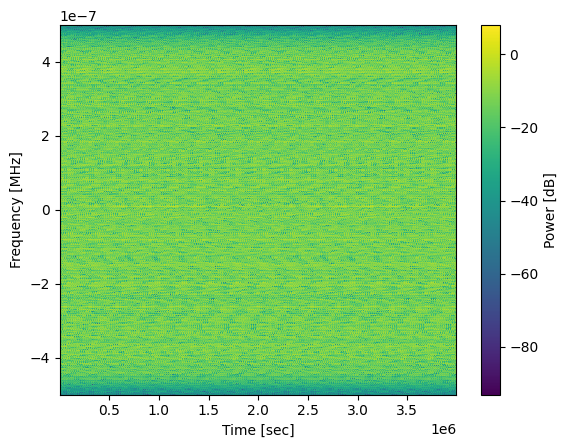

In [20]:
with open("Modrec_IQ_Samples/mod_traces_50/rtl/1/8psk_2mhz.dat", "rb") as f:
    data = np.fromfile(f, dtype=np.complex64)

spectrogram_plot(data, {})